In [2]:
# Importing libraries 

import pandas as pd
from matplotlib import pyplot
import numpy as np

In [3]:

import xlrd
data = pd.read_csv(r"C:\Users\Debanshu\Desktop\Bank marketing analysis\bank-full (1).csv")  #Original Data
subs_data = data.groupby('y').get_group('yes')     #Subs_data refers to Subscribers Data
    
# Defining functions
    
def count_values(data, column_name):
    data_value_counts = data[column_name].value_counts().rename_axis(column_name).reset_index(name='count')
    data_value_counts['percentage'] = (data_value_counts['count']/sum(data_value_counts['count']))*100
    return data_value_counts
    
def leads_data(data, subs_data, column_name):
    leads = count_values(subs_data, column_name)
    leads['conversion %'] = (count_values(subs_data, column_name)['count']/count_values(data, column_name)['count'])*100
    return leads[[column_name,'count','conversion %']]

def get_chart(data, subs_data, column_name):
    pyplot.style.use('seaborn-pastel')
    pyplot.ylabel(column_name)
    pyplot.xlabel('Total Count')
    pyplot.barh(count_values(data, column_name)[column_name], count_values(data, column_name)['count'], label = "Total Leads", color = 'grey')
    pyplot.barh(count_values(subs_data, column_name)[column_name], count_values(subs_data, column_name)['count'], color = 'purple', label = "Total Subscriptions")
    pyplot.legend()
    pyplot.tight_layout()
        
def detail_chart(data, column_name):
    pyplot.style.use('seaborn-pastel')
    pyplot.xlabel(column_name)
    pyplot.ylabel('Total Count')
    pyplot.bar(count_values(data, column_name)[column_name],count_values(data, column_name)['count'],edgecolor = 'black')
    pyplot.tight_layout()
        
def describe_parameter(data, column_name):
    return data[column_name].describe()
    
def get_pie(data, column_name):
    pyplot.pie(count_values(data, column_name)['count'], labels = count_values(data, column_name)[column_name], wedgeprops = {'edgecolor' : 'grey'}, autopct = '%1.1f%%')
    pyplot.title("Customers who subscribed to term Deposits")
    pyplot.tight_layout()

In [4]:
subs_data.count()

age              5289
job              5289
marital          5289
education        5289
default          5289
balance          5289
housing          5289
loan             5289
contact          5289
day              5289
month            5289
duration         5289
campaign         5289
pdays            5289
previous         5289
poutcome         5289
y                5289
Boolean_value    5289
dtype: int64

In [5]:
subs_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Boolean_value
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1
270,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,1
388,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes,1
390,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes,1
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes,1
457,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,1


In [6]:
data.count()

age              45211
job              45211
marital          45211
education        45211
default          45211
balance          45211
housing          45211
loan             45211
contact          45211
day              45211
month            45211
duration         45211
campaign         45211
pdays            45211
previous         45211
poutcome         45211
y                45211
Boolean_value    45211
dtype: int64

In [7]:
# Insights On Subscribers Informations

In [8]:
# Insight 1 : Out of 45211, only 5289 people are SUBSCRIBERS

In [9]:
#Age Analytics

a = count_values(subs_data, 'age').sort_values(by = 'percentage', ascending = False).head(10)
a


,age,count,percentage
0,32,221,4.178484
1,30,217,4.102855
2,33,210,3.970505
3,35,209,3.951598
4,31,206,3.894876
5,34,198,3.743619
6,36,195,3.686897
7,29,171,3.233125
8,37,170,3.214218
9,28,162,3.062961


In [10]:
sum(a['percentage']) 

# Insight 2: 37.04% Subscribers are in the age group of (29 to 39)

37.0391378332388

In [11]:
leads_data(data, subs_data, 'age').sort_values(by = 'conversion %', ascending = False).head(20).sort_values(by = 'age')

# Insight 3: The conversion rate lies mostly between 40 and 50 %, with rising above 80% for people of age 80 and above.

,age,count,conversion %
49,21,22,42.307692
40,62,39,48.750000
41,64,35,44.303797
51,65,21,47.727273
47,67,23,42.592593
50,68,21,42.000000
46,73,24,40.677966
58,74,13,40.625000
56,75,15,41.666667
54,76,16,41.025641


In [12]:
leads_data(data, subs_data, 'age').sort_values(by = 'conversion %', ascending = False).head(20).sort_values(by = 'count',ascending = False)

# Insight 4: The count vs conversion rate is best for age group = 62 and least for age group = 73 years

,age,count,conversion %
40,62,39,48.750000
41,64,35,44.303797
46,73,24,40.677966
47,67,23,42.592593
49,21,22,42.307692
48,77,22,40.740741
51,65,21,47.727273
50,68,21,42.000000
54,76,16,41.025641
56,75,15,41.666667


In [13]:
b = leads_data(data, subs_data, 'age').sort_values(by = 'conversion %').head(20).sort_values(by = 'age')
b

# Insight 5: In the age (60-90), the Leads conversion rate is 5X as compared to age group (25-55).

,age,count,conversion %
17,25,113,9.947183
7,29,171,10.082547
0,32,221,10.599520
10,38,144,10.627306
16,40,116,9.991387
14,41,120,10.126582
21,43,103,10.362173
24,44,93,10.208562
15,46,118,10.042553
18,47,113,10.386029


In [14]:
b['conversion %'].mean()

# Insight 6: Mean conversion rate for all the age groups is 10.102%

10.102409692741043

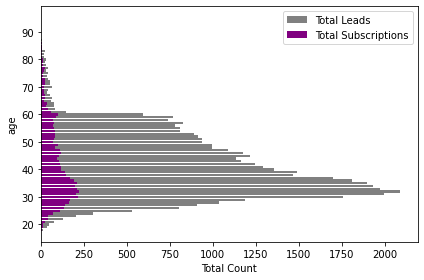

In [15]:
get_chart(data,subs_data, 'age')


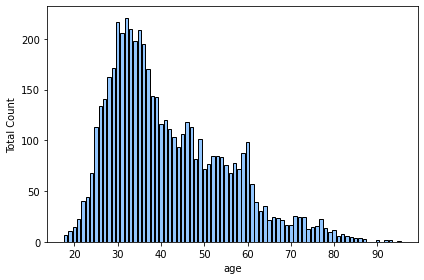

In [16]:
detail_chart(subs_data, 'age')


In [17]:
describe_parameter(subs_data, 'age')
# Insight 7: Last two graphs and insight show that people in the age group of 37 - 45 are targeted the most as the leads 

count    5289.000000
mean       41.670070
std        13.497781
min        18.000000
25%        31.000000
50%        38.000000
75%        50.000000
max        95.000000
Name: age, dtype: float64

In [18]:
# JOB ANALYTICS


In [19]:
count_values(subs_data, 'job').sort_values(by = 'percentage', ascending = False)

# Insight 8: People who work in Managment, Technician, and Blue-collor jobs are approached (as a lead) the most 
# Insight 9: People who are Self-employed, entrepreneur, and housemaid are approached (as a lead) the least . 

,job,count,percentage
0,management,1301,24.598223
1,technician,840,15.882019
2,blue-collar,708,13.386273
3,admin.,631,11.930422
4,retired,516,9.756098
5,services,369,6.976744
6,student,269,5.086028
7,unemployed,202,3.819247
8,self-employed,187,3.535640
9,entrepreneur,123,2.325581


In [20]:
leads_data(data, subs_data, 'job').sort_values(by = 'conversion %', ascending = False)
# Insight 10: Students, services people and Self-Employed people are easiest to convert 
# whereas technician, blue-collar and Entrepreneur are difficult to convert.
##

,job,count,conversion %
6,student,269,17.036099
5,services,369,16.298587
8,self-employed,187,14.351497
7,unemployed,202,13.584398
0,management,1301,13.368270
4,retired,516,12.421762
3,admin.,631,12.202669
11,unknown,34,11.805556
10,housemaid,109,11.620469
9,entrepreneur,123,9.919355


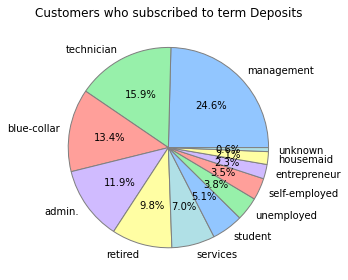

In [21]:
get_pie(subs_data, 'job')

In [22]:
describe_parameter(subs_data, 'job')

count           5289
unique            12
top       management
freq            1301
Name: job, dtype: object

In [23]:
# MARITAL STATUS ANALYTICS

In [24]:
subs_data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [25]:
df_marital = subs_data['marital'].value_counts().rename_axis("Marital Status").reset_index(name = "No of Subscribers")

df_marital

,Marital Status,No of Subscribers
0,married,2755
1,single,1912
2,divorced,622


In [26]:
data_marital = data['marital'].value_counts().rename_axis("Marital Status").reset_index(name = "No of Customers")

data_marital

,Marital Status,No of Customers
0,married,27214
1,single,12790
2,divorced,5207


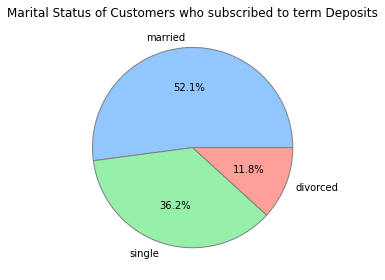

In [27]:
pyplot.pie(df_marital['No of Subscribers'], labels = df_marital['Marital Status'], 
           wedgeprops = {'edgecolor' : 'grey'}, autopct = '%1.1f%%')
pyplot.title("Marital Status of Customers who subscribed to term Deposits")
pyplot.tight_layout()

In [28]:
df_marital['Leads Conversion'] = df_marital['No of Subscribers']/data_marital['No of Customers']*100
df_marital
# Insight 11: Single people tend to subscribe term deposit the most. 
##

,Marital Status,No of Subscribers,Leads Conversion
0,married,2755,10.123466
1,single,1912,14.949179
2,divorced,622,11.945458


In [29]:
# EDUCATIONAL STATUS ANALYTICS

In [30]:
df_ed = subs_data['education'].value_counts().rename_axis('Education Level').reset_index(name = 'No of Subscribers')
df_ed

,Education Level,No of Subscribers
0,secondary,2450
1,tertiary,1996
2,primary,591
3,unknown,252


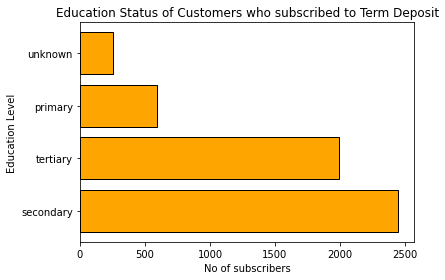

In [31]:
pyplot.barh(df_ed['Education Level'],df_ed['No of Subscribers'] , edgecolor = 'black', color = 'orange')
pyplot.ylabel('Education Level')
pyplot.xlabel('No of subscribers')
pyplot.title("Education Status of Customers who subscribed to Term Deposit")
pyplot.tight_layout()

# Insight 12: Well Educated people who have atleast secondary secondary education are more likely to subscribe 

In [32]:
# HOME LOAN AND PERSONAL LOAN ANALYTICS housing loan	personal loan


In [33]:
df_hl = subs_data['housing'].value_counts().rename_axis('Housing Loan Status').reset_index(name = 'No of Subscribers')
df_hl['% of Subscribers'] = df_hl['No of Subscribers']/sum(df_hl['No of Subscribers'])*100
df_hl
# Insight 13: Approximately 63% of the customers have a home loan on them.

,Housing Loan Status,No of Subscribers,% of Subscribers
0,no,3354,63.414634
1,yes,1935,36.585366


In [34]:
df_pl = subs_data['loan'].value_counts().rename_axis('personal loan status').reset_index(name = 'No of Subscribers')

df_pl['% of Subscribers'] = df_pl['No of Subscribers']/sum(df_pl['No of Subscribers'])*100
df_pl
# Insight 14: Only 9% of customers have personal loan on them.

,personal loan status,No of Subscribers,% of Subscribers
0,no,4805,90.848932
1,yes,484,9.151068


In [35]:
# CREDIT DEFAULTS ANALYTICS

In [36]:
df_cd = subs_data['default'].value_counts().rename_axis('credit default status').reset_index(name = 'No of Subscribers')
df_cd['% of Subscribers'] = df_pl['No of Subscribers']/sum(df_pl['No of Subscribers'])*100
df_cd

# Insight 15: Of all the customers subscribed, nearly 9% have defaulted the credit risk

,credit default status,No of Subscribers,% of Subscribers
0,no,5237,90.848932
1,yes,52,9.151068


In [37]:
# NO OF TIMES CONTACTED & DURATION ANALYTICS

In [38]:
# All the values in minutes.
df_dur = subs_data['duration']/60
df_dur.describe()

# Insight 16: Average duration per call for customers who subscribe to term deposit is 8.9 minutes, maximum call duration is 64 mins and minimum is 0.133 mins. 

count    5289.000000
mean        8.954910
std         6.542088
min         0.133333
25%         4.066667
50%         7.100000
75%        12.083333
max        64.683333
Name: duration, dtype: float64

In [39]:
subs_data['campaign'].describe()

count    5289.000000
mean        2.141047
std         1.921826
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: campaign, dtype: float64

In [40]:
df_cam = subs_data['campaign'].value_counts().rename_axis('No of times Contacted').reset_index(name = 'No of Subscribers')
df_cam['% of Subscribers'] = df_cam['No of Subscribers']/sum(df_cam['No of Subscribers'])*100
df_cam

# Insight 17: 48% of the customers subscribed within 1 contact and 87% of customers subscribed within 3 contacts during the campaign.

,No of times Contacted,No of Subscribers,% of Subscribers
0,1,2561,48.421252
1,2,1401,26.488939
2,3,618,11.684628
3,4,317,5.993572
4,5,139,2.628096
5,6,92,1.739459
6,7,47,0.888637
7,8,32,0.605029
8,9,21,0.397050
9,11,16,0.302515


In [41]:
subs_data['poutcome'].value_counts()


unknown    3386
success     978
failure     618
other       307
Name: poutcome, dtype: int64

In [42]:
#   employment variation rate - quarterly indicator (numeric) => emp.var.rate 
#   consumer price index - monthly indicator (numeric) =>  cons.price.idx
#   consumer confidence index - monthly indicator (numeric) => cons.conf.idx    
#   euribor 3 month rate - daily indicator (numeric) => euribor3m
#   number of employees - quarterly indicator (numeric) =>  nr.employed

#   This information is gained from Google and will be used later in this notebook

In [49]:
# FINAL INSIGHTS,

# Insight 1 : Out of 45211, only 5289 people are SUBSCRIBERS
# Insight 2: 37.04% Subscribers are in the age group of (29 to 39)
# Insight 3: The conversion rate lies mostly between 40 and 50 %, with rising above 80% for people of age 80 and above.
# Insight 4: The count vs conversion rate is best for age group = 62 and least for age group = 73 years
# Insight 5: In the age (60-90), the Leads conversion rate is 5X as compared to age group (25-55).
# Insight 6: Mean conversion rate for all the age groups is 10.102%
# Insight 7: Last two graphs and insight show that people in the age group of 37 - 45 are targeted the most as the leads
# Insight 8: People who work in Managment, Technician, and Blue-collor jobs are approached (as a lead) the most 
# Insight 9: People who are Self-employed, entrepreneur, and housemaid are approached (as a lead) the least . 
# Insight 10: Students, services people and Self-Employed people are easiest to convert, whereas technician, blue-collar and Entrepreneur are difficult to convert.
# Insight 11: Single people tend to subscribe term deposit the most. 
# Insight 12: Well Educated people who have atleast secondary secondary education are more likely to subscribe 
# Insight 13: Approximately 63% of the customers have a home loan on them.
# Insight 14: Only 9% of customers have personal loan on them.
# Insight 15: Of all the customers subscribed, nearly 9% have defaulted the credit risk
# Insight 16: Average duration per call for customers who subscribe to term deposit is 8.9 minutes, maximum call duration is 64 mins and minimum is 0.133 mins. 
# Insight 17: 48% of the customers subscribed within 1 contact and 87% of customers subscribed within 3 contacts during the campaign.

In [50]:
#CONCLUSIONS

# Conclusion 1 : 